<a href="https://colab.research.google.com/github/RenataTNT/Algorithms-of-Data-Analysis-/blob/master/RIrnazarova_Tutors_expected_math_exam_results_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Tutors - expected math exam results

## Реализация алгоритма градиентного бустинга

In [0]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np


In [0]:
data=pd.read_csv('train.csv', index_col='Id')

In [95]:
data.head()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
Id,,,,,,,,,,,
0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,63.0
1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,86.0
2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0


In [96]:
data.describe()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,45.878000,1.986800,1699.105000,1.719500,0.375000,0.132900,0.109600,0.053700,0.032100,0.019400,64.340800
std,8.043929,1.772213,524.886654,0.792264,0.484147,0.339484,0.312406,0.225436,0.176274,0.137933,13.536823
min,23.000000,0.000000,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000
25%,40.000000,0.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000
50%,46.000000,2.000000,1500.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000
75%,51.000000,3.000000,2150.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.000000
max,68.000000,10.000000,3950.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


(array([ 212.,  630., 1031., 1921., 1901., 1677.,  903., 1042.,  610.,
          73.]),
 array([ 32. ,  38.8,  45.6,  52.4,  59.2,  66. ,  72.8,  79.6,  86.4,
         93.2, 100. ]),
 <a list of 10 Patch objects>)

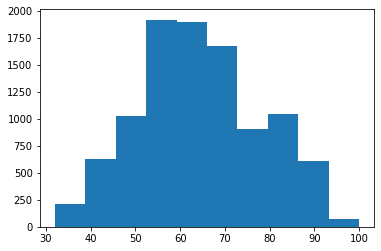

In [97]:
#гистограмма средних баллов
plt.hist(data['mean_exam_points'])

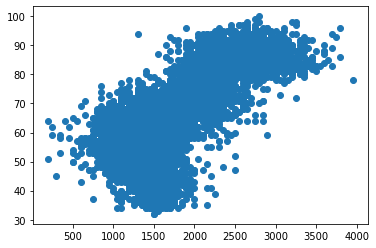

In [98]:
#разброс баллов в завимости от стоимости занятия
plt.scatter(data['lesson_price'], data['mean_exam_points'])

In [0]:
#разобьем цены за занятия по диапазонам и добавим столбец, объединив квалификацию и диапазон цены
def price_range(df):
  #df['price_range']=np.ceil(df['lesson_price']/200)*200

  #df['qualification_price']=df['qualification'].astype(str)+'_'+df['price_range'].astype(str)
  df['qualification_price']=df['qualification'].astype(str)+'_'+df['lesson_price'].astype(str)

In [100]:
price_range(data)
data.head()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,qualification_price
Id,,,,,,,,,,,,
0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,63.0,1.0_1400.0
1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,86.0,3.0_2850.0
2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,1.0_1200.0
3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,1.0_1400.0
4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,1.0_1500.0


In [0]:
#средние баллы в зависимости от квалификации и цены
MeanScoreByQualifiacation=data.groupby(['qualification_price'])[['mean_exam_points']].mean()


In [0]:
MeanScoreByQualifiacation=MeanScoreByQualifiacation.rename(columns={'mean_exam_points': 'mean_score'})

In [103]:
MeanScoreByQualifiacation

,mean_score
qualification_price,
1.0_1000.0,56.965517
1.0_1050.0,56.589744
1.0_1100.0,56.536723
1.0_1150.0,57.002710
1.0_1200.0,55.582888
...,...
4.0_2800.0,81.000000
4.0_2850.0,85.000000
4.0_2900.0,87.000000


In [0]:
#добавим столбец со средним балломм в зависимомти от квалификации
def MeanScore(df):


    df = pd.merge(df, MeanScoreByQualifiacation, on='qualification_price', how='left')

    return df

In [0]:
data=MeanScore(data)


In [106]:
data.describe()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,mean_score
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,45.878000,1.986800,1699.105000,1.719500,0.375000,0.132900,0.109600,0.053700,0.032100,0.019400,64.340800,64.340800
std,8.043929,1.772213,524.886654,0.792264,0.484147,0.339484,0.312406,0.225436,0.176274,0.137933,13.536823,11.534693
min,23.000000,0.000000,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,45.000000
25%,40.000000,0.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,56.589744
50%,46.000000,2.000000,1500.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000,60.584746
75%,51.000000,3.000000,2150.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.000000,71.906780
max,68.000000,10.000000,3950.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,93.000000


In [107]:
data_corr=data.corr()
print(data_corr['mean_exam_points'].sort_values(ascending=False))

mean_exam_points       1.000000
mean_score             0.852097
qualification          0.755963
lesson_price           0.721179
years_of_experience    0.205417
physics                0.187726
biology                0.023022
chemistry              0.017825
geography              0.014401
english                0.013174
history               -0.000113
age                   -0.007646
Name: mean_exam_points, dtype: float64


In [108]:
data.columns

Index(['age', 'years_of_experience', 'lesson_price', 'qualification',
       'physics', 'chemistry', 'biology', 'english', 'geography', 'history',
       'mean_exam_points', 'qualification_price', 'mean_score'],
      dtype='object')

In [0]:
#для анализа возьмем значимые столбцы
X=data[['years_of_experience', 'lesson_price', 'qualification',
       'physics', 'mean_score']]


In [110]:
X.head()

,years_of_experience,lesson_price,qualification,physics,mean_score
0,0.0,1400.0,1.0,1.0,59.087591
1,4.0,2850.0,3.0,1.0,86.525000
2,0.0,1200.0,1.0,0.0,55.582888
3,5.0,1400.0,1.0,0.0,59.087591
4,1.0,1500.0,1.0,0.0,48.899510


In [0]:
y=data['mean_exam_points']

In [112]:
X_predict=pd.read_csv('test.csv', index_col='Id')
X_predict.head()


,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
Id,,,,,,,,,,
10000,46.0,3.0,1050.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
10001,43.0,3.0,1850.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
10002,52.0,1.0,1550.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
10003,57.0,6.0,2900.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0
10004,44.0,4.0,3150.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0


In [113]:
pred_id=X_predict.index
pred_id

Int64Index([10000, 10001, 10002, 10003, 10004, 10005, 10006, 10007, 10008,
            10009,
            ...
            19990, 19991, 19992, 19993, 19994, 19995, 19996, 19997, 19998,
            19999],
           dtype='int64', name='Id', length=10000)

In [114]:
#подготовим данные, по которым будем делать предсказания
price_range(X_predict)
X_predict=MeanScore(X_predict)
X_predict.head()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,qualification_price,mean_score
0,46.0,3.0,1050.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0_1050.0,56.589744
1,43.0,3.0,1850.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0_1850.0,65.459459
2,52.0,1.0,1550.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0_1550.0,46.772575
3,57.0,6.0,2900.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0_2900.0,87.543478
4,44.0,4.0,3150.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0_3150.0,86.789474


In [0]:
X_predict=X_predict[['years_of_experience', 'lesson_price', 'qualification',
       'physics', 'mean_score']]


In [0]:
def data_normalize(df):
  for feature in df.columns:
    df[feature]=abs(df[feature])/(max(df[feature])-min(df[feature]))



In [0]:
def data_std(df):
  for feature in df.columns:
    df[feature]=(df[feature]-df[feature].mean())/df[feature].std()

  

In [118]:
#отмасштабируем
data_std(X)
data_std(X_predict)

# data_normalize(X)
# data_normalize(X_predict)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [119]:

X.head()


,years_of_experience,lesson_price,qualification,physics,mean_score
0,-1.121084,-0.569847,-0.908157,1.290930,-0.455427
1,1.135981,2.192654,1.616254,1.290930,1.923259
2,-1.121084,-0.950881,-0.908157,-0.774558,-0.759267
3,1.700247,-0.569847,-0.908157,-0.774558,-0.455427
4,-0.556818,-0.379330,-0.908157,-0.774558,-1.338682


In [120]:
X.describe()

,years_of_experience,lesson_price,qualification,physics,mean_score
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,-2.819966e-17,-5.198619e-17,-5.876410e-16,-3.176792e-16,-6.545279e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.121084e+00,-2.856055e+00,-9.081567e-01,-7.745579e-01,-1.676750e+00
25%,-1.121084e+00,-7.603642e-01,-9.081567e-01,-7.745579e-01,-6.719777e-01
50%,7.448314e-03,-3.793295e-01,3.540486e-01,-7.745579e-01,-3.256311e-01
75%,5.717145e-01,8.590331e-01,3.540486e-01,1.290930e+00,6.559325e-01
max,4.521578e+00,4.288345e+00,2.878459e+00,1.290930e+00,2.484609e+00


Реализуем средствами Python алгоритм градиентного бустинга для деревьев решений.

In [0]:
#from sklearn.tree import DecisionTreeRegressor

from sklearn import model_selection
import numpy as np

In [0]:
X_array=X.to_numpy()
y_array=y.to_numpy()

Разделим выборку на обучающую и тестовую в соотношении 70/30.

In [0]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_array, y_array, test_size=0.3)

In [124]:
len(y_train)

7000

In [125]:
X_train.shape, y_train.shape

((7000, 5), (7000,))

Опишем модель, реализующую построение дерева решений

In [0]:

# Реализуем класс узла
class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле

In [0]:
# И класс терминального узла (листа)

class Leaf:
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict()
        
    def predict(self):
  
        prediction = np.mean(self.labels)
        #print('prediction',prediction)

        return prediction

In [0]:
# Расчет критерия дисперсии

def variance(labels):
    l=0.0
   

    #impurity = np.var(labels)
    impurity = np.sum((labels-np.mean(labels))**2)/(len(labels)+l)
    return impurity

In [0]:
# Расчет качества

def quality(left_labels, right_labels, current_variance):

    # доля выбоки, ушедшая в левое поддерево

    p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
    
    return current_variance - p * variance(left_labels) - (1 - p) * variance(right_labels)
    #return current_variance - variance(left_labels) -  variance(right_labels)

In [0]:

# Разбиение датасета в узле

def split(data, labels, index, t):
    
    left = np.where(data[:, index] <= t)
    right = np.where(data[:, index] > t)
        
    true_data = data[left]
    false_data = data[right]
    true_labels = labels[left]
    false_labels = labels[right]
        
    return true_data, false_data, true_labels, false_labels

In [0]:
# Нахождение наилучшего разбиения

def find_best_split(data, labels):
    
    #  обозначим минимальное количество объектов в узле
    min_leaf = 2

    current_variance = variance(labels)

    best_quality = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    
    for index in range(n_features):

        # будем проверять только уникальные значения признака, исключая повторения
        t_values = np.unique([row[index] for row in data])

        if t_values.shape[0]>min_leaf*2:
          for t in t_values:
              true_data, false_data, true_labels, false_labels = split(data, labels, index, t)
              #  пропускаем разбиения, в которых в узле остается менее 5 объектов
              if len(true_data) < min_leaf or len(false_data) < min_leaf:
                  continue
              
              current_quality = quality(true_labels, false_labels, current_variance)
              
              #  выбираем порог, на котором получается максимальный прирост качества
              if current_quality > best_quality:
                  best_quality, best_t, best_index = current_quality, t, index


    return best_quality, best_t, best_index

In [0]:
# Построение дерева с помощью рекурсивной функции

def build_tree(data, labels, max_depth):

 
    quality, t, index = find_best_split(data, labels)

  

    #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
    if quality == 0 or max_depth==0:
        return Leaf(data, labels)
    else:

        true_data, false_data, true_labels, false_labels = split(data, labels, index, t)




        # Рекурсивно строим два поддерева
        true_branch = build_tree(true_data, true_labels, max_depth-1)
        false_branch = build_tree(false_data, false_labels, max_depth-1)

    # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
    return Node(index, t, true_branch, false_branch)

In [0]:
def classify_object(obj, node):

    #  Останавливаем рекурсию, если достигли листа
    if isinstance(node, Leaf):
        answer = node.prediction
        return answer

    if obj[node.index] <= node.t:
        return classify_object(obj, node.true_branch)
    else:
        return classify_object(obj, node.false_branch)

In [0]:
def predict(data, tree):
    
    classes = []
    for obj in data:
        prediction = classify_object(obj, tree)
        classes.append(prediction)
    return classes

Напишем функцию, реализующую предсказание в градиентном бустинге.

In [0]:
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [0]:
#подберем коэффициенты перед деревьями
def get_coef(X_, Y, w):

  w.append(1)



  w_list = []
 
  # список значений ошибок после каждой итерации
  errors = []
  error=10000000

  # шаг градиентного спуска
  alpha = 0.0001
  lambda_=0

  # максимальное число итераций
  max_iter = 1000

  # критерий сходимости (разница весов, при которой алгоритм останавливается)
  min_weight_dist = 0.001

  # зададим начальную разницу весов большим числом
  weight_dist = 100000

  # счетчик итераций
  iter_num = 0


  # ход градиентного спуска
  while weight_dist > min_weight_dist and iter_num < max_iter:

      

      y_pred=np.dot(X_,w)
      error=mean_squared_error(Y, y_pred)
      errors.append(error)


      m=X_.T@(y_pred- Y)/7000*alpha*2


      new_w = w - 2 * alpha * np.dot(X_.T, (y_pred- Y)) / Y.shape[0]

      weight_dist = np.linalg.norm(new_w - w, ord=2)

      w_list.append(new_w.copy())
      

      iter_num += 1
      w = new_w
      
  w_list = np.array(w_list)

  return list(w)

In [0]:
def answers_matrix(X, trees_list):
  matrix=[]
  for x in X:
       answers=[eta*classify_object(x,alg) for alg in trees_list]
       matrix.append(answers)
  return matrix

In [0]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta

   
    current_prediction=np.array([sum([eta* coef * classify_object(x,alg) for alg, coef in zip(trees_list, coef_list)]) for x in X])

    return current_prediction

В качестве функционала ошибки будем использовать среднеквадратичную ошибку. Реализуем соответствующую функцию.

In [0]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

Используем $L_{2}$ loss $L(y, z) = (y-z)^{2},$ ее производная по $z$ примет вид $L'(y, z) = 2(z-y)$. Реализуем ее также в виде функции (коэффициент 2 можно отбросить).

In [0]:
def bias(y, z):
    return (y - z)

Реализуем функцию обучения градиентного бустинга.

In [0]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta,subset_size=0.5):
    
    # Деревья будем записывать в список
    trees = []
    trees_answers = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    fit_size=int(subset_size*len(y_train))
 


    for i in range(n_trees):
        print('номер дерева',i)
        a=np.arange(len(y_train))

        np.random.shuffle(a)
   
        index_array=np.random.choice(a, fit_size, replace=False)
        X_train_new=X_train[index_array]
        y_train_new=y_train[index_array]
        


        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree = build_tree(X_train, y_train, max_depth)

        else:

            target = gb_predict(X_train, trees, coefs, eta)
            

            # алгоритмы начиная со второго обучаем на сдвиг
            tree = build_tree(X_train,bias(y_train, target), max_depth)
            trees_answers=np.array(answers_matrix(X_train, trees))

            
            
            if len(trees)>1:
              coefs=(get_coef(trees_answers, y_train, coefs))
  
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)

        
    return trees, train_errors, test_errors, coefs

Теперь обучим несколько моделей с разными параметрами и исследуем их поведение.

In [0]:
def r2_score(y, y_predict):
  return 1-np.sum((y_predict-y)**2)/np.sum((y-y.mean())**2)

In [0]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)
    print('y_train',y_train)
    print('train_prediction',train_prediction)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {r2_score(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {r2_score(y_test, test_prediction)}')
    return train_prediction, test_prediction

In [168]:
# Число деревьев в ансамбле
n_trees = 18

# для простоты примем коэффициенты равными 1

coefs = [1]
# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 0.4

trees, train_errors, test_errors, k = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

номер дерева 0
номер дерева 1
номер дерева 2
номер дерева 3
номер дерева 4
номер дерева 5
номер дерева 6
номер дерева 7
номер дерева 8
номер дерева 9
номер дерева 10
номер дерева 11
номер дерева 12
номер дерева 13
номер дерева 14
номер дерева 15
номер дерева 16
номер дерева 17


Text(0, 0.5, 'error')

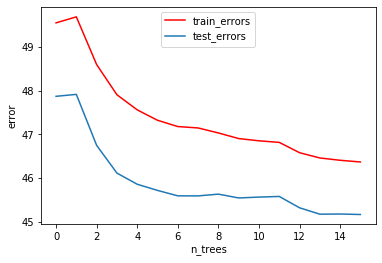

In [169]:
#изменение mse от количества деревьев
plt.plot(train_errors[1:n_trees], color='red', label='train_errors')

plt.plot(test_errors[1:n_trees], label='test_errors')

plt.legend(loc='upper center')
plt.xlabel('n_trees')
plt.ylabel('error')


In [170]:
test_errors

[1595.05418499784,
 47.872403994155896,
 47.916792572522446,
 46.75055522112635,
 46.11594507921903,
 45.85997108979171,
 45.719025111452055,
 45.59467628449876,
 45.59311699911506,
 45.63365665432255,
 45.546380628368546,
 45.56596065677097,
 45.58084264441226,
 45.321235494617355,
 45.17482489228307,
 45.178835280011874,
 45.16738286159591]

In [171]:
train_prediction, test_prediction=evaluate_alg(X_train, X_test, y_train, y_test, trees, k, eta)

y_train [82. 68. 51. ... 55. 76. 59.]
train_prediction [81.96702344 67.7074173  54.03501087 ... 53.89235971 63.3354655
 54.71849969]
Ошибка алгоритма из 18 деревьев глубиной 3     с шагом 0.4 на тренировочной выборке: 0.7478073331348227
Ошибка алгоритма из 18 деревьев глубиной 3     с шагом 0.4 на тестовой выборке: 0.7514176880009243


In [172]:
print(k)

[1.3150434690716566, 1.187697615864193, 0.7918921160746394, 1.0003233474648896, 1.0002656965717724, 1.0001086158849382, 1.0001188255694375, 1.0000825959212194, 1.0000109459768651, 1.000057849396708, 1.000054270291006, 1.0000162400896455, 1.0000131677076636, 1.0000356127735157, 1.000018289000549, 1.0000080188823708, 1.0000028472987572]


Построим графики зависимости ошибки на обучающей и тестовой выборках от числа итераций.

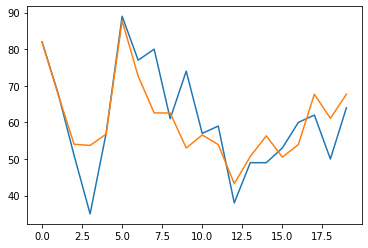

In [173]:
plt.plot(y_train[0:20])
plt.plot(train_prediction[0:20])

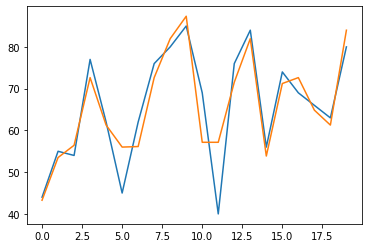

In [174]:
plt.plot(y_test[0:20])
plt.plot(test_prediction[0:20])

Сделаем предсказание

In [175]:
X_predict.head()

,years_of_experience,lesson_price,qualification,physics,mean_score
0,0.571977,-1.234296,-0.894033,-0.785004,-0.669531
1,0.571977,0.291657,0.366234,-0.785004,0.099446
2,-0.549547,-0.280575,-0.894033,1.273752,-1.520648
3,2.254262,2.294470,1.626501,1.273752,2.014060
4,1.132739,2.771331,1.626501,1.273752,1.948690


In [0]:
X_predictarray=X_predict.to_numpy()

In [177]:
final_prediction = gb_predict(X_predictarray, trees, k, eta)
final_prediction

array([57.62433084, 63.42593159, 52.75437512, ..., 57.58022108,
       65.53519959, 71.72053024])

In [178]:
pred_data=pd.DataFrame(index=pred_id)

pred_data['mean_exam_points']=final_prediction
pred_data

,mean_exam_points
Id,
10000,57.624331
10001,63.425932
10002,52.754375
10003,87.665279
10004,87.055212
...,...
19995,45.389329
19996,83.704492
19997,57.580221


In [0]:
finalDf=pd.DataFrame(pred_data)
finalDf.to_csv('/usr/pred_data.csv', sep=',')

